In [1]:
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()
import pyspark.sql.functions as f
from pyspark.sql.functions import *
sc = spark.sparkContext
import seaborn as sns

In [2]:
# Functionality for computing features
from pyspark.ml import feature
# Functionality for regression
from pyspark.ml import regression
# Funcionality for classification
from pyspark.ml import classification
# Object for creating sequences of transformations
from pyspark.ml import Pipeline
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [3]:
df = spark.read.csv('Data/hospital_readmission_cleaned.csv', header = True, inferSchema = True)

In [4]:
print("Shape of the Data:")
print((df.count(), len(df.columns)))

Shape of the Data:
(101766, 35)


In [5]:
df.show(1)

+---------+------+------+------+-------------------+-------------------------+---------------------+------+------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+----------------+-------------+---------+---------+-----------+-----------+--------------+-----------+---------+---------+------------+-------------+--------+--------+-------+-------------------+------+-----------+----------+
|     race|diag_1|diag_2|diag_3|admission_type_name|dischage_disposition_name|admission_source_name|gender|   age|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|number_diagnoses|max_glu_serum|A1Cresult|metformin|repaglinide|nateglinide|chlorpropamide|glimepiride|glipizide|glyburide|pioglitazone|rosiglitazone|acarbose|miglitol|insulin|glyburide-metformin|change|diabetesMed|readmitted|
+---------+------+------+------+-------------------+-------------------------+----

In [6]:
# Check for NAN
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).toPandas()

,race,diag_1,diag_2,diag_3,admission_type_name,dischage_disposition_name,admission_source_name,gender,age,time_in_hospital,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Check for NULL
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).toPandas()

,race,diag_1,diag_2,diag_3,admission_type_name,dischage_disposition_name,admission_source_name,gender,age,time_in_hospital,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Checking for missing, max, std for numerical variables
c = ['num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',\
     'diag_1', 'diag_2', 'diag_3']
df.select(['num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',\
     'diag_1', 'diag_2', 'diag_3']).describe().toPandas()

,summary,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3
0,count,101766,101766,101766,101766,101766,101766,101766,101766
1,mean,1.339730361810428,16.021844230882614,0.36935715268360747,0.19783621248747127,0.635565906098304,493.5693145294176,438.0879880076489,416.0872028167194
2,stddev,1.7058069791211554,8.127566209167284,1.2672650965326786,0.9304722684224636,1.2628632900973245,206.69582208921292,178.8447776692563,176.84509933007018
3,min,0,1,0,0,0,10,11,11
4,max,6,81,42,76,21,V71,V86,V86


In [9]:
# Frequency Table for Categorical Variables
freq_table = df.select(col("readmitted").cast("string")).groupBy("readmitted").count().toPandas()
freq_table

,readmitted,count
0,0,54864
1,1,46902


In [10]:
# Importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

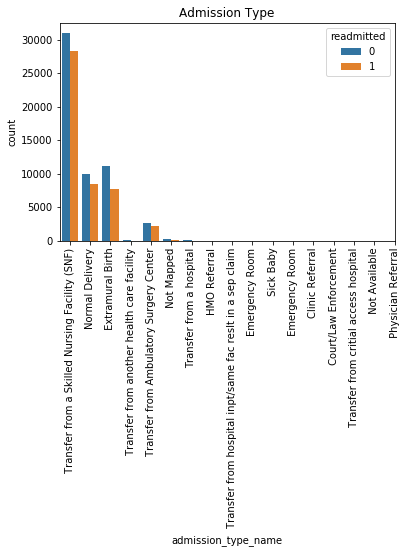

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Show histogram of the 'admission_type_name' column

# Create bars
sns.countplot(x = 'admission_type_name', data = df.toPandas(), hue ='readmitted')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)

# Adding Title
plt.title('Admission Type')
 
# Show graphic
plt.show()



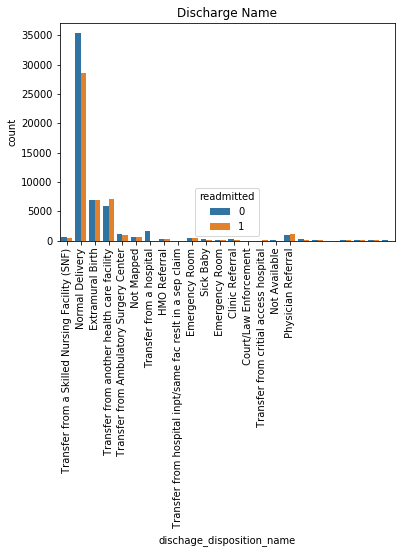

In [22]:
# Show histogram of the 'dischage_disposition_name' column

# Create bars
sns.countplot(x = 'dischage_disposition_name', data = df.toPandas(), hue ='readmitted')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)

# Adding Title
plt.title('Discharge Name')
 
# Show graphic
plt.show()




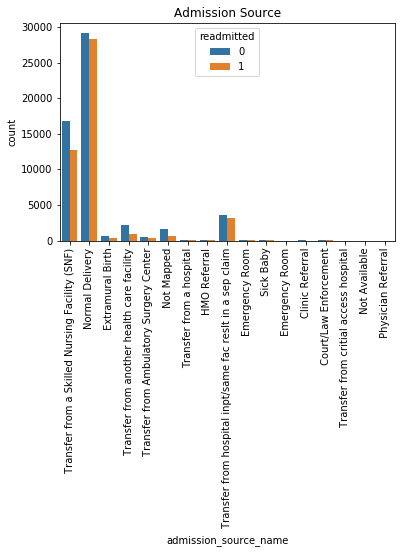

In [20]:
# Show histogram of the 'admission_source_name' column

# Create bars
sns.countplot(x = 'admission_source_name', data = df.toPandas(), hue ='readmitted')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)

# Adding Title
plt.title('Admission Source')
 
# Show graphic
plt.show()



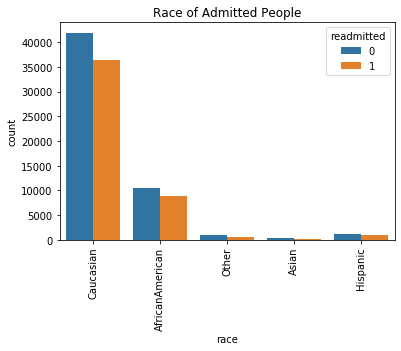

In [19]:
# Race of each Patient

# Create bars
sns.countplot(x = 'race', data = df.toPandas(), hue ='readmitted')

# Create names on the x-axis
plt.xticks(rotation = 90)

# Adding Title
plt.title('Race of Admitted People')
 
# Show graphic
plt.show()


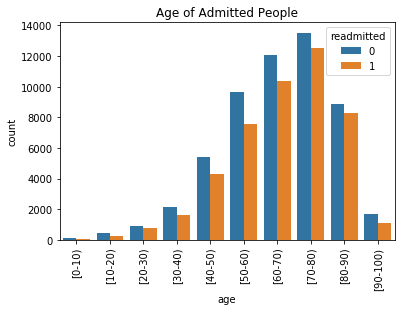

In [18]:
# Age of each Patient

# Create bars
sns.countplot(x = 'age', data = df.toPandas(), hue ='readmitted')

# Create names on the x-axis
plt.xticks(rotation = 90)

# Adding Title
plt.title('Age of Admitted People')
 
# Show graphic
plt.show()

